Datatype for index is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-11-09 to 2025-11-07
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXINUS  1248 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB
None
Index(['DEXINUS'], dtype='object')
                  DEXINUS
observation_date         
2020-11-09          74.03
2020-11-10          74.31
2020-11-11            NaN
2020-11-12          74.63
2020-11-13          74.56


MissingDataError: exog contains inf or nans

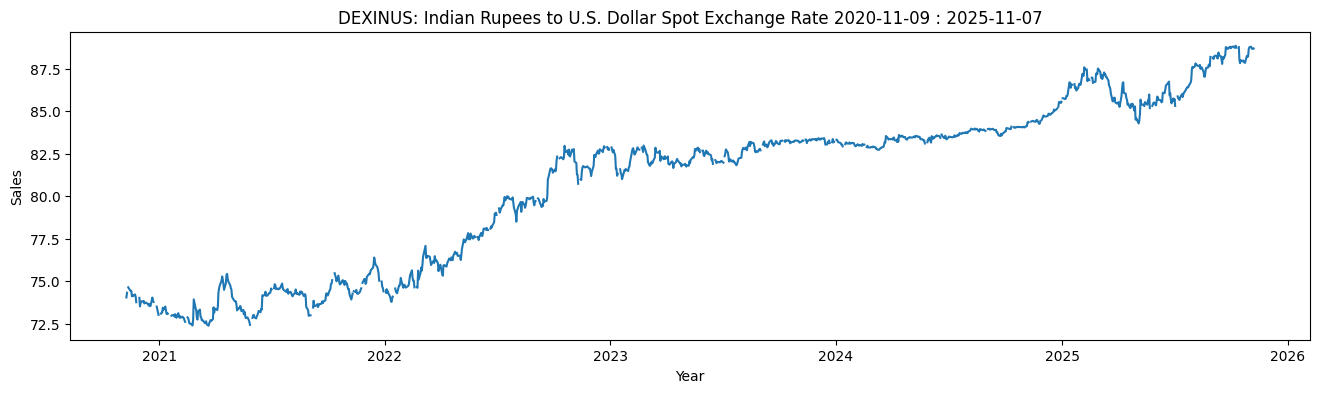

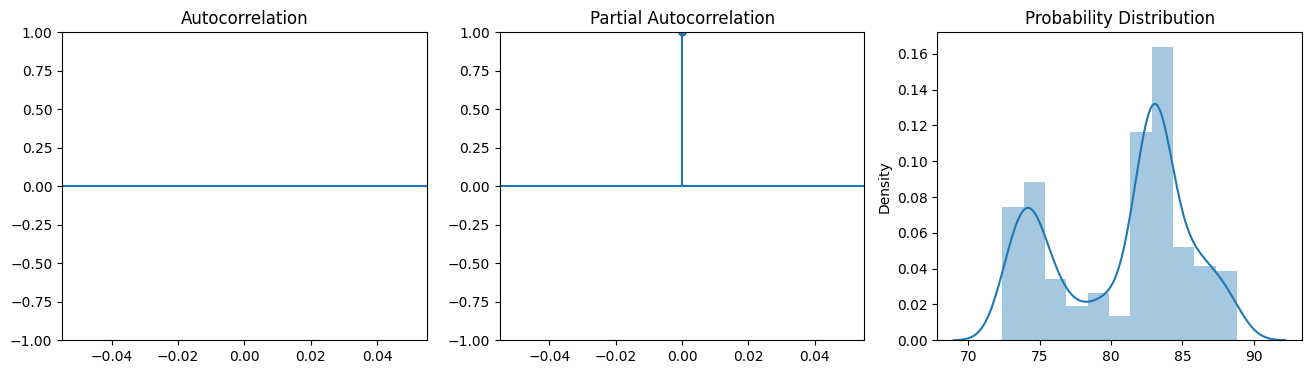

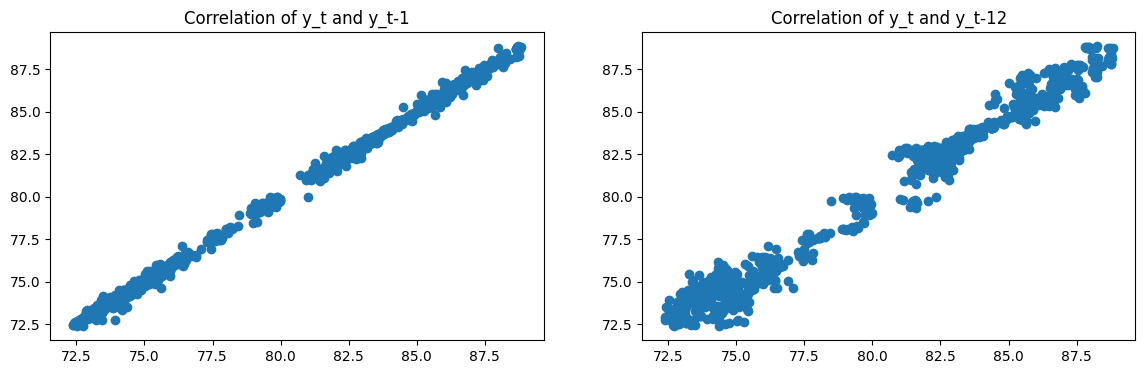

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

csv_location = "DEXINUS.csv"

# Load input CSV data
df = pd.read_csv(csv_location, index_col='observation_date', parse_dates=True)

# Lets describe and check the data and properties of dataframe
print("Datatype for index is", type(df.index)) # wanted to confirm parse_dates=True option
print(df.info())  # prints concise summary about DataFrame's structure
print(df.columns) # prints information about columns
print(df.head())  # prints first five rows - default

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def plot_data_properties(data, ts_plot_name="Time Series plot"):
    '''
    Summary:
    -------
    Plots various plots, including time series, autocorrelation,
    partial autocorrelation and distribution plots of data.
    
    Parameters:
    ----------
    ts_plot_name(String): The name of the time series plot
    data(pd.Dataframe, pd.Series, array): Time Series Data
    
    Returns:
    --------
    None
    
    '''
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)
    plt.ylabel('Sales')
    plt.xlabel('Year')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data, ax=axes[0,0], lags=48)
    plot_pacf(data, ax=axes[0,1], lags=48)
    sns.distplot(data, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

plot_data_properties(df, 'DEXINUS: Indian Rupees to U.S. Dollar Spot Exchange Rate 2020-11-09 : 2025-11-07')

fig, axes = plt.subplots(1,2, squeeze=False)
fig.set_size_inches(14,4)
axes[0,0].scatter(x=df[1:], y=df.shift(1)[1:])
axes[0,1].scatter(x=df[12:], y=df.shift(12)[12:])
axes[0,0].set_title('Correlation of y_t and y_t-1')
axes[0,1].set_title('Correlation of y_t and y_t-12')


from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    '''
    Summary:
    -------
    Performs Adfuller test on given time series data to test stationarity.
    p_val >= 0.05 means the data is not stationary, otherwise (p_val < 0.05) it is stationary.
    
    Parameters:
    data(pd.Dataframe, pd.Series. np.array): Time series data to be tested
    
    Return:
    ------
    '''
    p_val=adfuller(data['DEXINUS'])[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

test_stationarity(df)

SARIMA (Seasonal ARIMA) explicitly models seasonality, trend, and noise from the raw data. Hence the we must take input data which is already seasonaly adjusted. SARIMA learns and removes the seasonality internally.

https://fred.stlouisfed.org/series/DEXINUS

Indian Rupees to U.S. Dollar Spot Exchange Rate (DEXINUS) 